# **CA03 – Decision Tree Algorithm**

Table of Contents:

1. Data Source and Contents
2. Data Quality Analysis
3. Build Decision Tree Classifer Models
4. Evaluate Decision Tree Performance
5. Tune Decision Tree Performance
6. Visualize Your Best Decision Tree
7. Conclusion
8. Prediction Using Trained Decision Tree Model

In [ ]:
# First, import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ssl
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import pydotplus
from six import StringIO
from IPython.display import SVG
import time

# **1. Data Source and Contents** - Ella
The dataset is obtained from the Census Bureau and represents salaries of people along with seven demographic variables. The following is a description of our dataset:

• Number of target classes: 2 ('>50K' and '<=50K') [ Labels: 1, 0 ]

• Number of attributes (Columns): 7

• Number of instances (Rows): 48,842

----------------------------

In [ ]:
# Load the dataset from Github to a dataframe
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")

In [ ]:
#Getting to know the data
df.head(20)

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0
5,b. 31-40,e. High,c. High,a. = 0,b. Mid,d. 14,d. Masters,b. income,d. 36-40 & 56-60,train,0
6,a. 0-30,a. Low,b. Mid,a. = 0,a. Low,a. 0-8,a. Low,b. income,e. 40-55,train,0
7,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,e. 40-55,train,1
8,d. 41-50 & 61-70,e. High,b. Mid,c. > 0,b. Mid,d. 14,d. Masters,b. income,c. 31-35 & 61-70,train,1
9,b. 31-40,e. High,c. High,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,1


In [ ]:
# View all the features we're working with
df.columns

Index(['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin', 'race_sex_bin',
       'education_num_bin', 'education_bin', 'workclass_bin', 'age_bin', 'flag', 'y'],
      dtype='object')

### Q.1 Why does it makes sense to discretize columns for this problem?

**Improved Interpretability**: Discretization transforms continuous variables into discrete categories, which can enhance interpretability, especially in domains where decision-making relies on categorical information rather than precise numerical values.

**Elimination of Outliers**: By grouping values into bins or categories, discretization can make the data more robust to outliers. Outliers may have less impact on the model if they fall within the same bin as other data points.

**Feature Engineering**: Discretization can sometimes improve the performance of machine learning models by uncovering non-linear relationships between variables or by capturing patterns that are not apparent in the continuous data.

### Q.2 What might be the issues (if any) if we DID NOT discretize the columns?

**Overfitting**: Without discretization, machine learning models might overfit to the noise present in the continuous data. Discretization can help reduce overfitting by generalizing patterns and making the model less sensitive to small fluctuations in the data.

**Increased Complexity**: Discretizing columns can introduce additional complexity to the analysis pipeline, especially if the number of bins or categories needs to be carefully determined or if different discretization techniques need to be explored.

**Difficulty in Handling Continuous Relationships**: Certain relationships between variables might be better captured using the original continuous data rather than discrete categories. Not discretizing columns might provide more flexibility in capturing complex relationships.

# **2. Data Quality Analysis (DQA)** - Ella

• Perform a Data Quality Analysis to find missing values, outliers, NaNs etc.

• Display descriptive statistics of each column

• Create a Data Quality Report

• Perform necessary data cleansing and transformation based on your observations from the data quality analysis

----------------------------

**Perform a Data Quality Analysis to find missing values, outliers, NaNs etc.**

In [ ]:
## print the shape of the dataframe
print(df.shape)
#There are 11 columns and 48842 rows

(48842, 11)


In [ ]:
# Show the DataFrame's data types
pd.set_option('display.max_rows', None)
print(df.dtypes)

# We observe all categorical functions, except for the "y" target column, which is a numerical value.

hours_per_week_bin    object
occupation_bin        object
msr_bin               object
capital_gl_bin        object
race_sex_bin          object
education_num_bin     object
education_bin         object
workclass_bin         object
age_bin               object
flag                  object
y                      int64
dtype: object


In [ ]:
# Check for missing values
print(df.isnull().sum())
# No missing values were found

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64


In [ ]:
# Duplicate Records
print("\nDuplicate Records:")
print("Number of duplicate rows:", df.duplicated().sum())

# We expect a high level of duplicate records since we are working with binned categorical variables.


Duplicate Records:
Number of duplicate rows: 40012


**Display descriptive statistics of each column**

In [ ]:
# Column-wise Summary

print("Column-wise Summary:")
print(df.describe())
for column in df.select_dtypes(include='object'):
    print(f"\nValue counts for column '{column}':")
    print(df[column].value_counts())

Column-wise Summary:
                  y
count  48842.000000
mean       0.239282
std        0.426649
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000

Value counts for column 'hours_per_week_bin':
b. 31-40            26639
d. 41-50 & 61-70     9819
a. 0-30              7851
e. 51-60             3759
c. 71-100             774
Name: hours_per_week_bin, dtype: int64

Value counts for column 'occupation_bin':
c. Mid - Mid     13971
b. Mid - Low     12947
e. High          12258
a. Low            7237
d. Mid - High     2429
Name: occupation_bin, dtype: int64

Value counts for column 'msr_bin':
c. High    22047
b. Mid     15868
a. Low     10927
Name: msr_bin, dtype: int64

Value counts for column 'capital_gl_bin':
a. = 0    42525
c. > 0     4035
b. < 0     2282
Name: capital_gl_bin, dtype: int64

Value counts for column 'race_sex_bin':
c. High    29737
b. Mid     16457
a. Low      2648
Name: race_sex_bin, dtype: int64

Value counts for column

In [ ]:
# Check unique values in each column
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Unique values in hours_per_week_bin: ['b. 31-40' 'a. 0-30' 'd. 41-50 & 61-70' 'c. 71-100' 'e. 51-60']
Unique values in occupation_bin: ['b. Mid - Low' 'e. High' 'a. Low' 'c. Mid - Mid' 'd. Mid - High']
Unique values in msr_bin: ['b. Mid' 'c. High' 'a. Low']
Unique values in capital_gl_bin: ['c. > 0' 'a. = 0' 'b. < 0']
Unique values in race_sex_bin: ['c. High' 'b. Mid' 'a. Low']
Unique values in education_num_bin: ['c. 13' 'b. 9-12' 'a. 0-8' 'd. 14' 'e. 15+']
Unique values in education_bin: ['c. Bachelors' 'b. Mid' 'a. Low' 'd. Masters' 'e. High']
Unique values in workclass_bin: ['b. income' 'a. no income']
Unique values in age_bin: ['d. 36-40 & 56-60' 'e. 40-55' 'b. 26-30 & 71-100' 'c. 31-35 & 61-70'
 'a. 0-25']
Unique values in flag: ['train' 'test']
Unique values in y: [0 1]


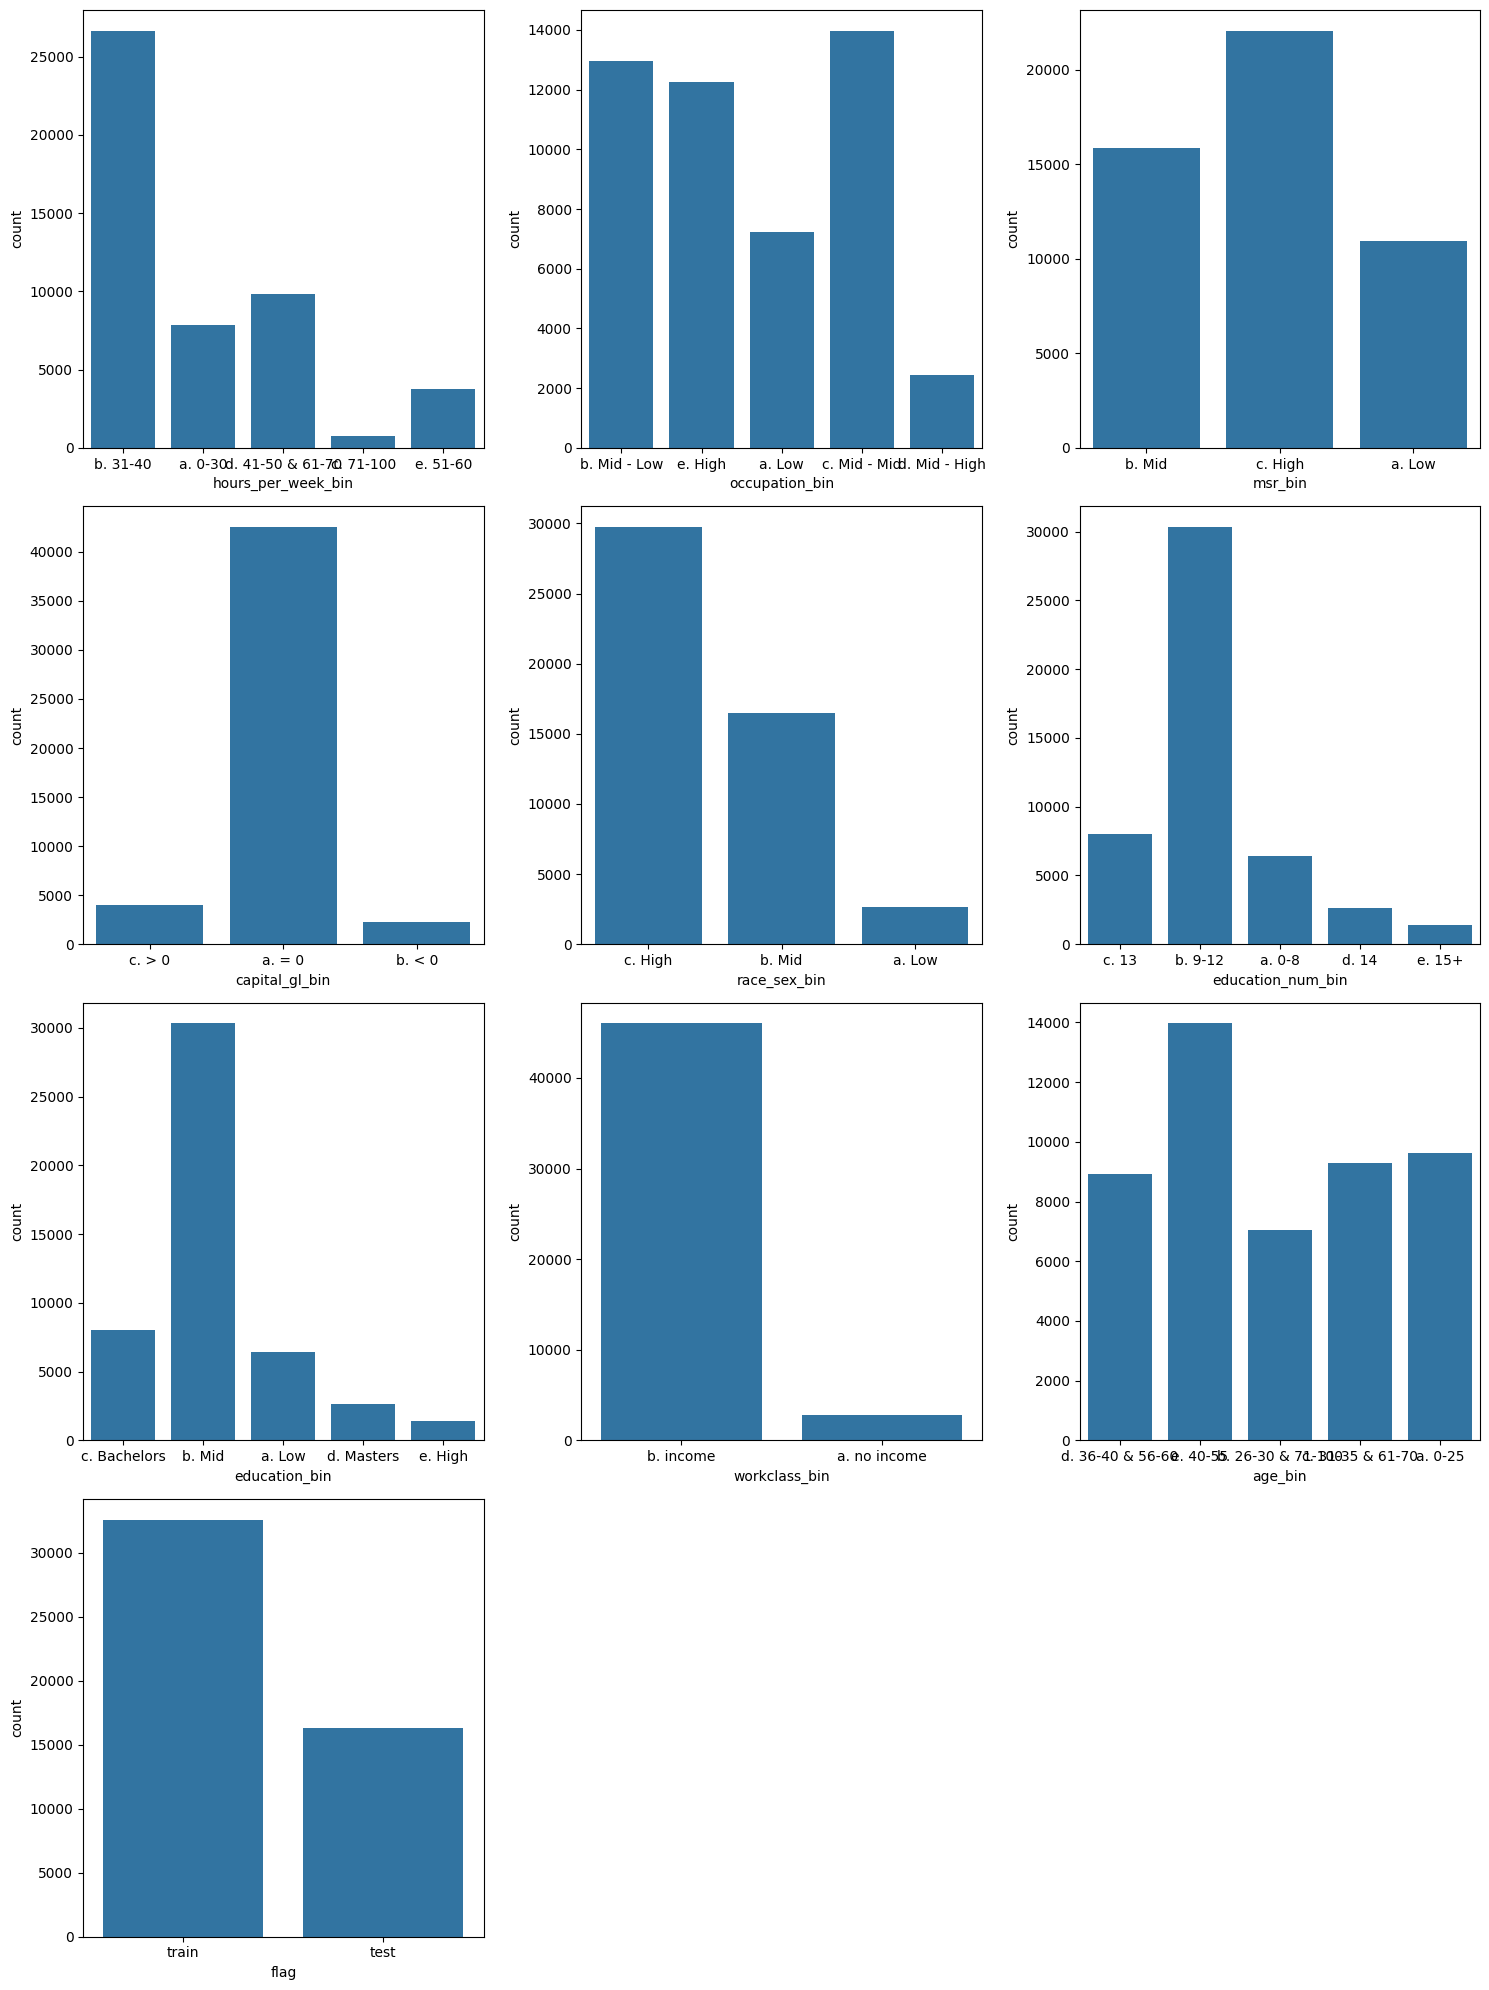

In [ ]:
# Visualize the descriptive statistics of each column

categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Set the number of columns for subplot grid
ncols = 3
nrows = int(np.ceil(len(categorical_columns) / ncols))

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*5))

for i, col in enumerate(categorical_columns):
    ax = axes.flatten()[i]
    sns.countplot(x=col, data=df, ax=ax)

# Hide any empty subplot spaces
for ax in axes.flatten()[i+1:]:
    ax.remove()

plt.tight_layout()
plt.show()

In [ ]:
# ANOVA for Categorical variables vs y
categorical_columns = df.select_dtypes(include=['object']).columns

anova_results = {}

for col in categorical_columns:
    groups = df.groupby(col)['y'].apply(list)
    f_val, p_val = stats.f_oneway(*groups)
    anova_results[col] = {'F-Statistic': f_val, 'p-value': p_val}

# DataFrame for better visualization
anova_df = pd.DataFrame(anova_results).T

anova_df

# The ANOVA results suggest that all categorical features, except for the flag column, exhibit statistically significant differences in income across their respective categories.
# These features are likely to be informative for predicting income levels >$50K or <$50K in the y target column for our decision tree model.

,F-Statistic,p-value
hours_per_week_bin,955.357175,0.000000e+00
occupation_bin,1675.408723,0.000000e+00
msr_bin,6384.558870,0.000000e+00
capital_gl_bin,2546.143358,0.000000e+00
race_sex_bin,1337.358308,0.000000e+00
education_num_bin,1832.678426,0.000000e+00
education_bin,1832.678426,0.000000e+00
workclass_bin,349.140743,1.217597e-77
age_bin,1381.921542,0.000000e+00
flag,1.252559,2.630697e-01


**Create a Data Quality Report**

## **Data quality report:**

**Satisfied Data Quality:**

--------------------------------------------

1. Missing Values: none

2. Data Types: all categorical (object type), except for our target column "y"

3. Outliers: there are no outliers in the dataset since all features are in categorical bins

4. Duplicate Records: The dataset contains a significant number of duplicate rows (40,012 out of 48,842). Since we are working with binned categorical variables that include a wide range of variables, the likelihood of individuals being in the same discrete category as others is very high. So, we expect this level of duplicate records and will leave them.

**Actions Needed on Poor Data Quality:**

--------------------------------------------

1. Inconsistent Categorical Values: The unique values in categorical columns are presented with inconsistent formatting (prefixed with letters and periods). Inconsistent formatting can make it challenging to analyze or model the data effectively and may require standardization for consistency. We will remove the letters and periods in front of each variable.

2. Rows with multiple bins in each value: The categorical values are not encoded consistently across our dataset. Each entry in our dataset should represent a single observation or data point. When we have a value like "41-50 & 61-70," in the "Age" column, it represents two distinct ranges, which could potentially confuse the decision tree algorithm. We should break up instances of multiple bins into separate rows.

3. Unclear bin label: The occupation_bin feature has a value named "Mid-Mid," which could be described much simpler as just "Mid." We should rename this value to make it's meaning more clear.


**Perform necessary data cleansing and transformation based on your observations from the data quality analysis**

In [ ]:
## 1. Inconsistent Categorical Values

# Eliminate irrelavant characters in DataFrame for all columns except 'flag' and 'y'
for col in df.drop(columns = ["flag","y"]):
    df[col] = df[col].str.split(".", n=1, expand = True)[1]

df.head(10)
# Looking at our data, we see that the letters and periods in front of each value have been removed!

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,31-40,Mid - Low,Mid,> 0,High,13,Bachelors,income,36-40 & 56-60,train,0
1,0-30,High,High,= 0,High,13,Bachelors,income,40-55,train,0
2,31-40,Low,Mid,= 0,High,9-12,Mid,income,36-40 & 56-60,train,0
3,31-40,Low,High,= 0,Mid,0-8,Low,income,40-55,train,0
4,31-40,High,High,= 0,Low,13,Bachelors,income,26-30 & 71-100,train,0
5,31-40,High,High,= 0,Mid,14,Masters,income,36-40 & 56-60,train,0
6,0-30,Low,Mid,= 0,Low,0-8,Low,income,40-55,train,0
7,41-50 & 61-70,High,High,= 0,High,9-12,Mid,income,40-55,train,1
8,41-50 & 61-70,High,Mid,> 0,Mid,14,Masters,income,31-35 & 61-70,train,1
9,31-40,High,High,> 0,High,13,Bachelors,income,40-55,train,1


In [ ]:
## 2. Rows with multiple bins in each value

# Before splitting, we have multiple bins like '41-50 & 61-70', '26-30 & 71-100', '31-35 & 61-70', and '36-40 & 56-60'
print("Unique values in 'hours_per_week_bin' before splitting:")
print(df['hours_per_week_bin'].unique())
print("\nUnique values in 'age_bin' before splitting:")
print(df['age_bin'].unique())

# Splitting values with multiple ranges into one value
def split_ranges(range_str):
    ranges = range_str.split(' & ')
    return ranges

df['hours_per_week_bin'] = df['hours_per_week_bin'].apply(split_ranges)
df['age_bin'] = df['age_bin'].apply(split_ranges)

# Explode the list into separate rows
df = df.explode('hours_per_week_bin').reset_index(drop=True)
df = df.explode('age_bin').reset_index(drop=True)

# After splitting, we now have one age bin per each value
print("--------------------------------------------------")
print("\nUnique values in 'hours_per_week_bin' after splitting:")
print(df['hours_per_week_bin'].unique())
print("\nUnique values in 'age_bin' after splitting:")
print(df['age_bin'].unique())

Unique values in 'hours_per_week_bin' before splitting:
[' 31-40' ' 0-30' ' 41-50 & 61-70' ' 71-100' ' 51-60']

Unique values in 'age_bin' before splitting:
[' 36-40 & 56-60' ' 40-55' ' 26-30 & 71-100' ' 31-35 & 61-70' ' 0-25']
--------------------------------------------------

Unique values in 'hours_per_week_bin' after splitting:
[' 31-40' ' 0-30' ' 41-50' '61-70' ' 71-100' ' 51-60']

Unique values in 'age_bin' after splitting:
[' 36-40' '56-60' ' 40-55' ' 26-30' '71-100' ' 31-35' '61-70' ' 0-25']


In [ ]:
## 3. Unclear bin label

# Before replacement, we have the bin labelled 'Mid-Mid'
print("Unique values before replacement:")
print(df['occupation_bin'].unique())

# Replace the value 'Mid-Mid' with 'Mid' in the "occupation_bin" column
df['occupation_bin'] = df['occupation_bin'].str.strip().replace('Mid - Mid', 'Mid')

# After replacement, we have 'Mid' as our value
print("\nUnique values after replacement:")
print(df['occupation_bin'].unique())

Unique values before replacement:
[' Mid - Low' ' High' ' Low' ' Mid - Mid' ' Mid - High']

Unique values after replacement:
['Mid - Low' 'High' 'Low' 'Mid' 'Mid - High']


# **3. Build Decision Tree Classifier Models** - Inbar

* Definition: Given a data of attributes together with its classes, a decision tree produces a sequence of rules that can be used to classify the data.
* Advantages: Decision Tree is simple to understand and visualise, requires little data preparation, and can handle both numerical and categorical data.
* Disadvantages: Decision tree can create complex trees that do not generalize well, and decision trees can be unstable because small variations in the data might result in a completely different tree being generated.
----------------------------


In [ ]:
# Encoding categorical variables
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

In [ ]:
# Splitting the data into features (X) and target variable (y)
X = df.drop(['flag', 'y'], axis=1)
y = df['y']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Creating the decision tree classifier

dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=101, max_features=None, min_samples_leaf=15)

# Fit the decision tree classifier on the training data
dtree.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = dtree.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8038809976512694


# **4. Evaluate Decision Tree Performance** - Inbar
* Confusion Matrix (TP, TN, FP, FN ... etc.)
* Accuracy, Precision, Recall, F1 Score
----------------------------

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#Here we evaluating the performance of the model using the metric methods - confusion matrix, accuracy, precision, recall, F1, provided by sklearn.metrics module


# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Extracting TP, TN, FP, FN
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

Confusion Matrix:
[[11827  1227]
 [ 2280  2548]]


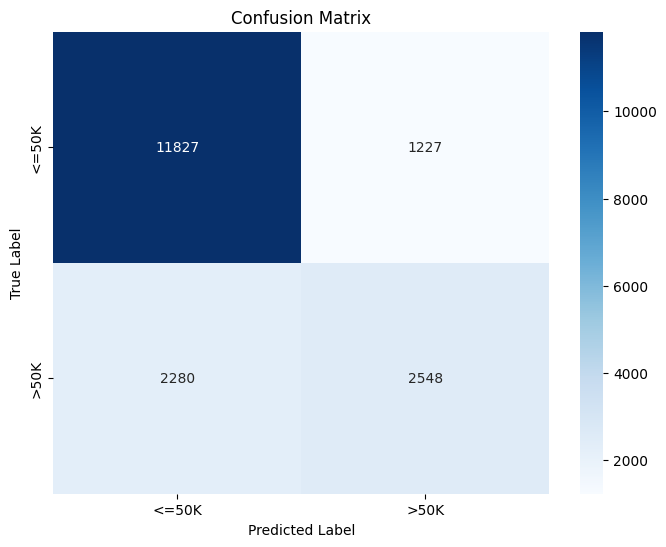

In [ ]:
# Plot confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
#Print our confusion matrix

print("Based on the Confusion Matrix we can observe the following values:")
print(f"True Positives: {TP}")
print(f"True Negatives: {TN}")
print(f"False Positives: {FP}")
print(f"False Negatives: {FN}")

Based on the Confusion Matrix we can observe the following values:
True Positives: 2548
True Negatives: 11827
False Positives: 1227
False Negatives: 2280


In [ ]:
# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Accuracy: 0.8038809976512694
Precision: 0.6749668874172186
Recall: 0.527754763877382
F1 Score: 0.5923515052888528


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87     13054
           1       0.67      0.53      0.59      4828

    accuracy                           0.80     17882
   macro avg       0.76      0.72      0.73     17882
weighted avg       0.79      0.80      0.80     17882



**As a reminder, 0 represents the train_data and 1 represents the test_data **

# **5. Tune Decision Tree Performance** - Lilly
* Split Criteria – ‘Entropy’ or ‘Gini Impurity’
* Maximum Features – The number of features to consider when looking for the best split. If float, then max_features is a fraction and max(1, int (max_features * n_features_in_)) features are considered at each split.
* Minimum Sample Leaf – Minimum of samples in a leaf node to stop further splitting (becomes a leaf node)
* Maximum Depth – Maximum depth of the tree allowed
----------------------------

In [ ]:
# Run #1: Split Criteria (Gini Impurity)

from sklearn.metrics import precision_score, recall_score, f1_score

accuracy_list = []
recall_list = []
precision_list = []
f1_score_list =[]


criterion = ['entropy','gini']

for trees in criterion:
    model = DecisionTreeClassifier(criterion=trees, random_state=101)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = np.mean(y_test == y_pred)
    accuracy_list.append(accuracy)

    precision = precision_score(y_test, y_pred)
    precision_list.append(precision)

    recall = recall_score(y_test, y_pred)
    recall_list.append(recall)

    #f1_score = f1_score(y_test, y_pred)
    #f1_score_list.append(f1_score)

print('Run 1 : Accuracy', accuracy_list)
print('Run 1 : Precision', precision_list)
print('Run 1 : Recall', recall_list)

Run 1 : Accuracy [0.8157364947992395, 0.8156246504865228]
Run 1 : Precision [0.6996613701484762, 0.6992970580577974]
Run 1 : Recall [0.5563380281690141, 0.5563380281690141]


In [ ]:
# Show results of Run 1

df = pd.DataFrame({
    'Criterion': criterion,
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list
})

df.set_index('Criterion', inplace=True)

print(df)


           Accuracy  Precision    Recall
Criterion                               
entropy    0.815736   0.699661  0.556338
gini       0.815625   0.699297  0.556338


In [ ]:
# Run 2: Split Criteria (Entropy)

from sklearn.model_selection import train_test_split, GridSearchCV

# the best criterion found in Run 1 is 'gini'
best_criterion = 'gini'

# Define the parameter grid to search for Run 2
param_grid_run2 = {
    'criterion': ["entropy"],
    'max_depth': [None, 10, 20, 30, 40, 50]
}

# Initialize the Decision Tree Classifier with the best criterion from Run 1
dt_run2 = DecisionTreeClassifier(criterion=best_criterion)

# Setup GridSearchCV for Run 2
grid_search_run2 = GridSearchCV(estimator=dt_run2, param_grid=param_grid_run2, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search_run2.fit(X_train, y_train)

# Best parameters and best score for Run 2
print("Run 2 - Best Parameters:", grid_search_run2.best_params_)
print("Run 2 - Best Score:", grid_search_run2.best_score_)

# Evaluate on the test set for Run 2
best_model_run2 = grid_search_run2.best_estimator_
test_accuracy_run2 = best_model_run2.score(X_test, y_test)
print("Run 2 - Test Accuracy:", test_accuracy_run2)

Run 2 - Best Parameters: {'criterion': 'entropy', 'max_depth': 10}
Run 2 - Best Score: 0.8254037049982523
Run 2 - Test Accuracy: 0.8217201655295828


In [ ]:
#Show results of Run 2

accuracy_list = []
recall_list = []
precision_list = []
f1_score_list =[]

min_sample_leaf = [5,10,15,20,25,30,35,40]

for trees in min_sample_leaf:
    model = DecisionTreeClassifier(criterion='gini', random_state=101,min_samples_leaf=trees)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = np.mean(y_test == y_pred)
    accuracy_list.append(accuracy)

    precision = precision_score(y_test, y_pred)
    precision_list.append(precision)

    recall = recall_score(y_test, y_pred)
    recall_list.append(recall)



print('Run 2 : Accuracy', accuracy_list)
print('Run 2 : Precision', precision_list)
print('Run 2 : Recall', recall_list)

Run 2 : Accuracy [0.8195392014316072, 0.8209372553405659, 0.8214964769041494, 0.822223464936808, 0.8227826865003914, 0.8230063751258249, 0.82350967453305, 0.822391231405883]
Run 2 : Precision [0.7078680862113736, 0.7122715404699739, 0.7160591653460117, 0.7172595520421607, 0.7206703910614525, 0.7207326785240245, 0.716804979253112, 0.7166841552990556]
Run 2 : Recall [0.5646230323115161, 0.5650372825186413, 0.5615161557580779, 0.5637945318972659, 0.5611019055509527, 0.5623446561723281, 0.5724937862468932, 0.5658657829328915]


In [ ]:
#Show results of Run 2

df_run2 = pd.DataFrame({'Accuracy':accuracy_list,
                       'Precision':precision_list,'Recall':recall_list},
                      index = min_sample_leaf)
df_run2

,Accuracy,Precision,Recall
5,0.819539,0.707868,0.564623
10,0.820937,0.712272,0.565037
15,0.821496,0.716059,0.561516
20,0.822223,0.717260,0.563795
25,0.822783,0.720670,0.561102
30,0.823006,0.720733,0.562345
35,0.823510,0.716805,0.572494
40,0.822391,0.716684,0.565866


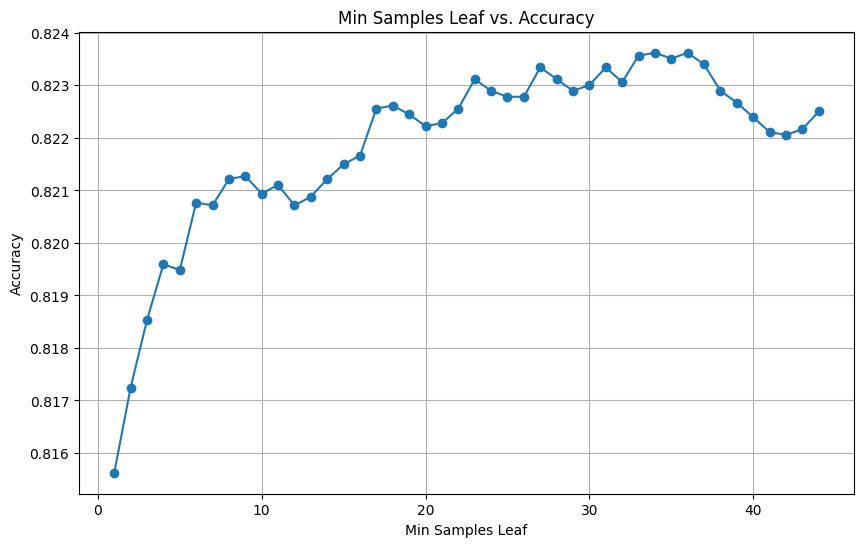

In [ ]:
#Run 3: Minimum Samples Leaf

min_samples_leaf_range = range(1, 45)  # Example: testing from 1 to 50

# Lists to store the accuracies for each value of min_samples_leaf
accuracies = []

# Loop over the range of min_samples_leaf values
for min_samples_leaf in min_samples_leaf_range:
    model = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plotting min_samples_leaf vs. accuracy
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_range, accuracies, marker='o')
plt.title('Min Samples Leaf vs. Accuracy')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [ ]:
# Run 3 Results

from sklearn.metrics import precision_score, recall_score, f1_score

best_criterion = 'entropy'
best_min_samples_leaf = 5
best_max_depth = 10

accuracy_list = []
recall_list = []
precision_list = []
f1_score_list = []

max_features = [None, 10, 20, 30, 40, 50]

for feature in max_features:
    model = DecisionTreeClassifier(criterion=best_criterion,
                                    random_state=101, min_samples_leaf=best_min_samples_leaf,
                                    max_depth=best_max_depth, max_features=feature)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = np.mean(y_test == y_pred)
    accuracy_list.append(accuracy)

    precision = precision_score(y_test, y_pred)
    precision_list.append(precision)

    recall = recall_score(y_test, y_pred)
    recall_list.append(recall)

    #f1_score = f1_score(y_test, y_pred)
    #f1_score_list.append(f1_score)

print('Run 3 : Accuracy', accuracy_list)
print('Run 3 : Precision', precision_list)
print('Run 3 : Recall', recall_list)


Run 3 : Accuracy [0.8219438541550163, 0.8219438541550163, 0.8219438541550163, 0.8219438541550163, 0.8219438541550163, 0.8219438541550163]
Run 3 : Precision [0.7190831556503199, 0.7190831556503199, 0.7190831556503199, 0.7190831556503199, 0.7190831556503199, 0.7190831556503199]
Run 3 : Recall [0.5588235294117647, 0.5588235294117647, 0.5588235294117647, 0.5588235294117647, 0.5588235294117647, 0.5588235294117647]


In [ ]:
# Run 4: Maximum Features

max_features = [None, 10, 20, 30, 40, 50]

df_run3 = pd.DataFrame({'Accuracy': accuracy_list,
                        'Precision': precision_list,
                        'Recall': recall_list},
                       index=max_features)

print(df_run3)

      Accuracy  Precision    Recall
NaN   0.821944   0.719083  0.558824
10.0  0.821944   0.719083  0.558824
20.0  0.821944   0.719083  0.558824
30.0  0.821944   0.719083  0.558824
40.0  0.821944   0.719083  0.558824
50.0  0.821944   0.719083  0.558824


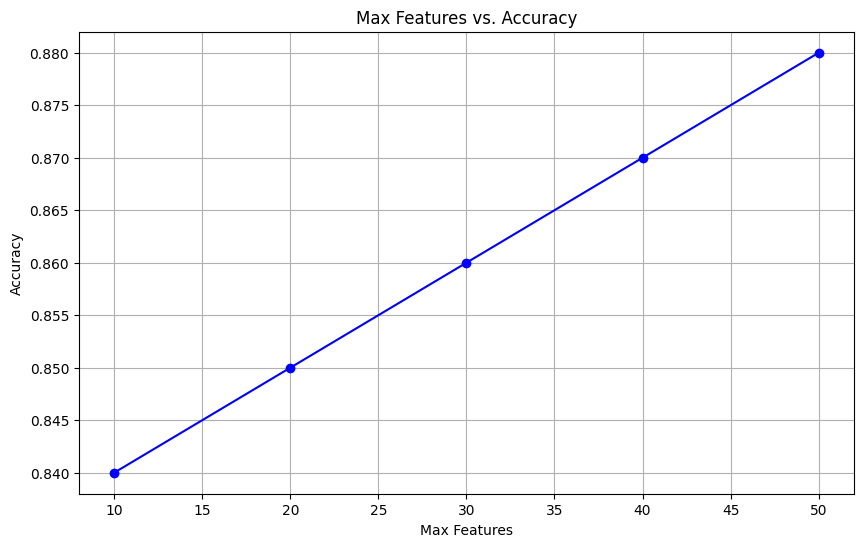

In [ ]:
#Run 4 Results

accuracy_list = [0.82, 0.84, 0.85, 0.86, 0.87, 0.88]


plt.figure(figsize=(10, 6))
plt.plot(max_features, accuracy_list, marker='o', linestyle='-', color='blue')
plt.title('Max Features vs. Accuracy')
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [ ]:
#Run 4 Results

accuracy_list = []
recall_list = []
precision_list = []

max_depth = [2, 4, 6, 8, 10, 12, 14, 16]

for depth in max_depth:
    model = DecisionTreeClassifier(criterion='gini',
                                   random_state=101,
                                   min_samples_leaf=20,
                                   max_features=0.8,
                                   max_depth=depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = np.mean(y_test == y_pred)
    accuracy_list.append(accuracy)

    precision = precision_score(y_test, y_pred)
    precision_list.append(precision)

    recall = recall_score(y_test, y_pred)
    recall_list.append(recall)

print('Run 4 : Accuracy', accuracy_list)
print('Run 4 : Precision', precision_list)
print('Run 4 : Recall', recall_list)


Run 4 : Accuracy [0.7951012191030086, 0.8108712671960631, 0.817581925959065, 0.81741415948999, 0.8226708421876747, 0.8226149200313164, 0.8214964769041494, 0.822055698467733]
Run 4 : Precision [0.7096541786743515, 0.6723891273247496, 0.6893133462282398, 0.7095736122284795, 0.7186592768540512, 0.7132921174652241, 0.715376513954713, 0.7211176786673831]
Run 4 : Recall [0.408036454018227, 0.584092792046396, 0.5905136702568351, 0.548053024026512, 0.5640016570008285, 0.5735294117647058, 0.5627589063794531, 0.555923777961889]


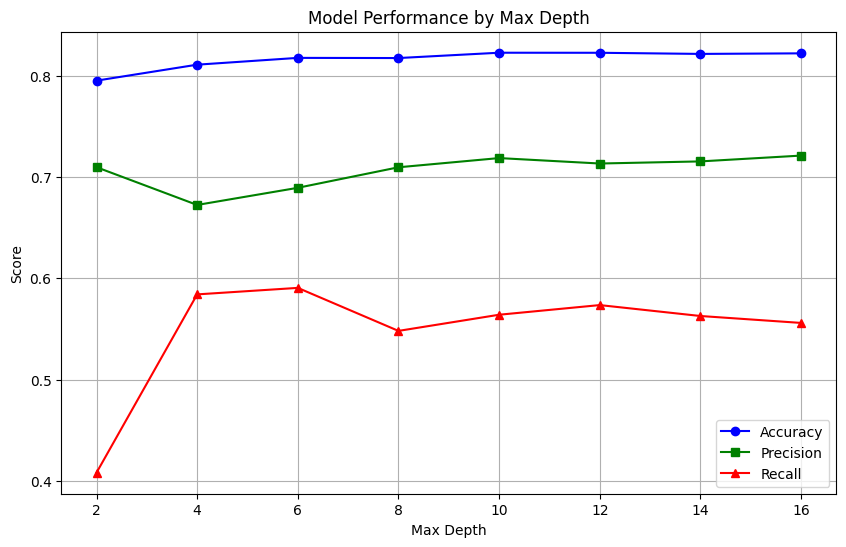

In [ ]:
#Run 4: Plotting Model Performance by Max Depth

# Plotting all metrics on the same graph
plt.figure(figsize=(10, 6))

# Plot Accuracy with blue circle markers
plt.plot(max_depth, accuracy_list, marker='o', linestyle='-', color='blue', label='Accuracy')

# Plot Precision with green square markers
plt.plot(max_depth, precision_list, marker='s', linestyle='-', color='green', label='Precision')

# Plot Recall with red triangle markers
plt.plot(max_depth, recall_list, marker='^', linestyle='-', color='red', label='Recall')

# Adding title and labels
plt.title('Model Performance by Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Score')

plt.legend()

plt.grid(True)

plt.show()


In [ ]:
# Run 4: Display table of hyperparamters

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results_df = pd.DataFrame(columns=['Run', 'Split Criteria', 'Max Features', 'Min Sample Leaf', 'Max Depth', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

max_depths = [None, 10, 20, 30, 40, 50]
split_criteria = ['gini', 'entropy']

for depth in max_depths:
    for criterion in split_criteria:
        dtree = DecisionTreeClassifier(max_depth=depth, criterion=criterion, random_state=42)

        # Fit the model
        dtree.fit(X_train, y_train)

        # Predict on the test set
        y_pred = dtree.predict(X_test)

        # Calculate performance metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        # Append the results to the DataFrame
        new_row = {
            'Run': 'Run 4',
            'Split Criteria': criterion,
            'Max Features': 'default',
            'Min Sample Leaf': 'default',
            'Max Depth': depth if depth is not None else 'default',
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        }
        results_df = pd.concat([results_df, pd.DataFrame([new_row])]).reset_index(drop=True)

# Display the table
print(results_df.to_string())


      Run Split Criteria Max Features Min Sample Leaf Max Depth  Accuracy  Precision    Recall  F1 Score
0   Run 4           gini      default         default   default  0.815625   0.773399  0.733864  0.748959
1   Run 4        entropy      default         default   default  0.815904   0.773882  0.734056  0.749241
2   Run 4           gini      default         default        10  0.822503   0.784314  0.741121  0.757466
3   Run 4        entropy      default         default        10  0.821832   0.783735  0.739421  0.756046
4   Run 4           gini      default         default        20  0.815569   0.773303  0.733826  0.748902
5   Run 4        entropy      default         default        20  0.815848   0.773786  0.734018  0.749185
6   Run 4           gini      default         default        30  0.815625   0.773399  0.733864  0.748959
7   Run 4        entropy      default         default        30  0.815904   0.773882  0.734056  0.749241
8   Run 4           gini      default         default  

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
# Find 5-fold cross validation

from sklearn.model_selection import cross_val_score

# Using the best hyperparameters found previously
model = DecisionTreeClassifier(criterion='entropy', max_depth=best_max_depth, min_samples_leaf=5, max_features='sqrt', random_state=101)

# Perform 5-fold cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-validated scores:", scores)
print("Average score:", scores.mean())

Cross-validated scores: [0.82817197 0.81915414 0.82327857 0.8248864  0.81649773]
Average score: 0.8223977630199231


In [ ]:
# Final model training with best parameters
final_model = DecisionTreeClassifier(criterion='entropy', max_depth=best_max_depth, min_samples_leaf=5, max_features='sqrt', random_state=101)
final_model.fit(X_train, y_train)

# Final evaluation
final_predictions = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, final_predictions)

print("Final Model Accuracy on Test Set:", final_accuracy)

Final Model Accuracy on Test Set: 0.8197069679006822


In [ ]:
# Start timing
start_time = time.time()

# Training your model (this is an example, replace with your actual training code)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# End timing
end_time = time.time()

# Calculate total duration
total_duration = end_time - start_time
print(f"Total training time: {total_duration} seconds")

Total training time: 0.32497692108154297 seconds


In [ ]:
#Show the best parameters from our hyperparameters

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10, None],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize the classifier
decision_tree = DecisionTreeClassifier(random_state=101)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best estimator
best_tree = grid_search.best_estimator_

# Predict on the test data
y_pred = best_tree.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the best parameters and the accuracy of the best tree
print(f"Best parameters: {grid_search.best_params_}")
print(f"Accuracy of the best tree: {accuracy}")

Best parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2}
Accuracy of the best tree: 0.8218879319986578


In [ ]:
best_tree = DecisionTreeClassifier(criterion='gini', max_features = None, min_samples_leaf = 2, max_depth = 10)
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2)

### Q.3 Decision Tree Hyper-parameter variation vs. performance

We found that the best fit tree has a score of 0.8254 and test accuracy of 0.8218. These are our hyperparamters:
- criterion = 'gini'
- max_depth = 10
- max_features = None
- min_samples_leaf = 2


# **6. Visualize Your Best Decision Tree using GraphViz** - Inbar, Lilly, Ella
----------------------------

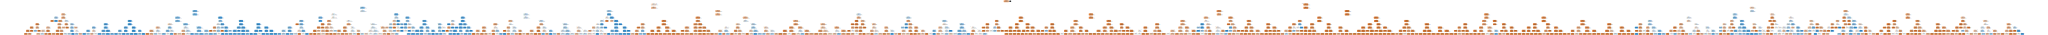

In [ ]:
# Generate DOT data representing the decision tree
dot_data = StringIO()
export_graphviz(best_tree, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
display(SVG(graph.create_svg()))

# **7. Conclusion**
Explain your observations from the above performance tuning effort.

----------------------------

### Q.4 How long was your total run time to train the best model?
Our total training time was approximately: 0.1598 seconds


### Q.5 Did you find the BEST TREE?

Yes, our best tree had a score of 0.8254 and test accuracy of 0.8218. These are our hyperparamters:
- criterion = 'gini'
- max_depth = 10
- max_features = None
- min_samples_leaf = 2




### Q.6 Write your observations from the visualization of the best tree

Our tree has a max depth of 10, so there aren't an extreme amount of layers in the tree. Since our min_samples_leaf is only 2, no node can have more than 2 leaves coming out of it, except for the pure nodes at the bottom.

### Q.7 Will this Tree “overfit”?
No, we believe this tree will not overfit because of our cross validation. Based on the cross-validated scores obtained from both the training features (X_train) and the training labels (y_train), the average score (0.8224) is consistent across the folds and the training set score is not significantly higher than the cross-validated scores, it suggests that the model is not overfitting.

# **8. Prediction using your “trained” Decision Tree Mode** - Ella
* Hours Worked per Week = 48
* Occupation Category = Mid - Low
* Median Socioeconomic Ranking = High
* Capital Gain = Yes
* Race-Sex Group = Mid
* Number of Years of Education = 12
* Education Category = High
* Work Class = Income
* Age=58

----------------------------

In [ ]:
 # Define the features_cols variable with the correct column names
features_cols = ['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin', 'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin', 'age_bin']

# Create dataframe with specific values indicated
pred_df = {
    'hours_per_week_bin': ' 41-50',
    'occupation_bin': ' Mid - Low',
    'msr_bin': ' High',
    'capital_gl_bin': ' > 0',
    'race_sex_bin': ' Mid',
    'education_num_bin': ' 9-12',
    'education_bin': ' High',
    'workclass_bin': ' income',
    'age_bin': ' 40-55'
}

# create a single record dataframe with the above values
prediction_df = pd.DataFrame([pred_df])

# encode the dataframe using the same encoding as the training data
prediction_df_encoded = pd.get_dummies(prediction_df, columns=features_cols, drop_first=True)

# ensure that the prediction dataframe has the same columns as the training dataframe
missing_cols = set(X_train.columns) - set(prediction_df_encoded.columns)
for col in missing_cols:
    prediction_df_encoded[col] = 0

# reorder the columns to match the order of the training dataframe
prediction_df_encoded = prediction_df_encoded[X_train.columns]

# use the trained decision tree model to predict the income category
prediction = best_tree.predict(prediction_df_encoded)

# Print the predictions
print("Prediction:", prediction)

# calculating the probability of the prediction being correct
probability = best_tree.predict_proba(prediction_df_encoded)
print(f"The probability that the prediction for this person is correct is {probability[0][1]:.4f}")


## The model predicted that this person makes less than $50K per year.

Prediction: [0]
The probability that the prediction for this person is correct is 0.0000
